### Gradient descent

>0 f([-0.76595664]) = 0.58669
>1 f([-0.61276531]) = 0.37548
>2 f([-0.49021225]) = 0.24031
>3 f([-0.3921698]) = 0.15380
>4 f([-0.31373584]) = 0.09843
>5 f([-0.25098867]) = 0.06300
>6 f([-0.20079094]) = 0.04032
>7 f([-0.16063275]) = 0.02580
>8 f([-0.1285062]) = 0.01651
>9 f([-0.10280496]) = 0.01057
>10 f([-0.08224397]) = 0.00676
>11 f([-0.06579517]) = 0.00433
>12 f([-0.05263614]) = 0.00277
>13 f([-0.04210891]) = 0.00177
>14 f([-0.03368713]) = 0.00113
>15 f([-0.0269497]) = 0.00073
>16 f([-0.02155976]) = 0.00046
>17 f([-0.01724781]) = 0.00030
>18 f([-0.01379825]) = 0.00019
>19 f([-0.0110386]) = 0.00012
>20 f([-0.00883088]) = 0.00008
>21 f([-0.0070647]) = 0.00005
>22 f([-0.00565176]) = 0.00003
>23 f([-0.00452141]) = 0.00002
>24 f([-0.00361713]) = 0.00001
>25 f([-0.0028937]) = 0.00001
>26 f([-0.00231496]) = 0.00001
>27 f([-0.00185197]) = 0.00000
>28 f([-0.00148158]) = 0.00000
>29 f([-0.00118526]) = 0.00000


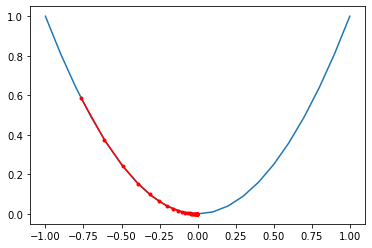

In [2]:
# source: https://machinelearningmastery.com/
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)

# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

# symbolic lib sympy 이용하는 접근

### [sympy 참고1] (https://docs.sympy.org/latest/index.html) 
### [sympy 참고2] (https://nohihon.tistory.com/55)

In [3]:
# source: 

import numpy as np 
import scipy as sc 
from sympy import *
import sys
sys.displayhook = pprint
init_printing()
print('\n\n Initial Setup Complete')

def batch_gradient_descent(c_f, f):	
	print("f(x) = ",c_f)
	f_dash = diff(c_f,x)
	print("df(x)/dx = " , f_dash)
	a = float(input("Enter initial approximation: "))
	x0=a
	n = float(input("Enter learning rate: "))
	err = float(input("Enter error tolerance : "))
	print("Starting Batch Gradient Descent")
	print("x0 = ",a)
	print("f(x0) = ",f(a))
	iter_count = 0
	xk=x0
	while (True):
		iter_count = iter_count + 1
		#print "Iteration No. ", iter_count, ": "		
		fk_dash= (lambdify(x , f_dash , "numpy"))(xk)
		xk = xk - n*fk_dash
		#print "	x"+str(iter_count)+" = ",xk
		#print "	f(x"+str(iter_count)+") = ",f(xk)
		if abs(N(xk-x0)) < float(err):
			break
		x0 = xk
	print("Number of Iterations = ",iter_count)
	print("	Minima is at = ",xk)
	print("	Minimum value of Cost Function= ",f(xk))


#Syntax Constraints
function_list="""
	Syntax Constraints for entering function - 
	x**y means x raised to the power of y
	Function must be algebraic combination of one or more of - 
	p(x)      Polynomials
	exp(x)    Mathematical constant e (2.71828...) raised to power x
	pi        Mathematical constant 3.14159...
	log(x)    Natural Logarithm
	acos(x)   Arc cosine of x
	asin(x)   Arc sine of x
	atan(x)   Arc tangent of x
	cos(x)    Cosine of x
	sin(x)    Sine of x
	tan(x)    Tangent of x
	acosh(x)  Inverse hyperbolic cosine of x
	asinh(x)  Inverse hyperbolic sine of x
	atanh(x)  Inverse hyperbolic tangent of x
	cosh(x)   Hyperbolic cosine of x
	sinh(x)   Hyperbolic cosine of x
	tanh(x)   Hyperbolic tangent of x	
"""

print(function_list)
#example cost_functions are given
#cost_function = '-2*((-x+1/x)/(x*(x-1/x)**2)-1/(x*(x-1/x)))'
#cost_function="(7/2)*x**3 - x**9 +1"
#cost_function="6*x**5+11*x**4 -33*x**3-33*x**2 + 11*x+6"
x = Symbol('x')
cost_function=input("Enter cost function f(x):  ").strip()
c_f=sympify(cost_function)
#will lambdify c_f for fast parrallel multipoint computation 
f = lambdify(x, c_f, "numpy")
#print("Verify f(0.9)")
#print N(f(0.9))

batch_gradient_descent(c_f, f)



 Initial Setup Complete

	Syntax Constraints for entering function - 
	x**y means x raised to the power of y
	Function must be algebraic combination of one or more of - 
	p(x)      Polynomials
	exp(x)    Mathematical constant e (2.71828...) raised to power x
	pi        Mathematical constant 3.14159...
	log(x)    Natural Logarithm
	acos(x)   Arc cosine of x
	asin(x)   Arc sine of x
	atan(x)   Arc tangent of x
	cos(x)    Cosine of x
	sin(x)    Sine of x
	tan(x)    Tangent of x
	acosh(x)  Inverse hyperbolic cosine of x
	asinh(x)  Inverse hyperbolic sine of x
	atanh(x)  Inverse hyperbolic tangent of x
	cosh(x)   Hyperbolic cosine of x
	sinh(x)   Hyperbolic cosine of x
	tanh(x)   Hyperbolic tangent of x	

Enter cost function f(x):  x**2-4*x+5
f(x) =  x**2 - 4*x + 5
df(x)/dx =  2*x - 4
Enter initial approximation: 5
Enter learning rate: 0.1
Enter error tolerance : 0.001
Starting Batch Gradient Descent
x0 =  5.0
f(x0) =  10.0
Number of Iterations =  30
	Minima is at =  2.003713820117856
	Mi